In [3]:

import pandas as pd
data = pd.read_csv('../data/Nutrition.csv')
data.head()

data.info()








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [4]:

data.loc[data['YearStart'] != data['YearEnd']]

activity = data.drop(columns='YearEnd')

activity = activity.loc[activity['Topic'] == 'Physical Activity - Behavior']
activity.drop(columns=["Total", "Education", "Age(years)", "Gender", "Race/Ethnicity", "GeoLocation"], inplace=True)
activity = activity[activity['StratificationCategory1'] == "Income"]
activity.info()




<class 'pandas.core.frame.DataFrame'>
Index: 13930 entries, 13 to 104269
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   13930 non-null  int64  
 1   LocationAbbr                13930 non-null  object 
 2   LocationDesc                13930 non-null  object 
 3   Datasource                  13930 non-null  object 
 4   Class                       13930 non-null  object 
 5   Topic                       13930 non-null  object 
 6   Question                    13930 non-null  object 
 7   Data_Value_Unit             11620 non-null  float64
 8   Data_Value_Type             13930 non-null  object 
 9   Data_Value                  13775 non-null  float64
 10  Data_Value_Alt              13775 non-null  float64
 11  Data_Value_Footnote_Symbol  155 non-null    object 
 12  Data_Value_Footnote         155 non-null    object 
 13  Low_Confidence_Limit        13775 

In [5]:
# maps income ranges to numeric values
income_dict = {'Less than $15,000':0,
  '$15,000 - $24,999':15,
  '$25,000 - $34,999':25,
  "$35,000 - $49,999":35,
  '$50,000 - $74,999':50,
  '$75,000 or greater':75,
        }

# removes data not reported
activity_clean = activity.loc[activity['Income'] != 'Data not reported']

# creates numeric column of income based on mappings
activity_clean['numeric_income'] = activity_clean['Income'].replace(income_dict)


/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_32183/3216604992.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  activity_clean['numeric_income'] = activity_clean['Income'].replace(income_dict)
/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_32183/3216604992.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_clean['numeric_income'] = activity_clean['Income'].replace(income_dict)


In [6]:
# onyl include question of interest
noleisuretime = activity_clean[activity_clean['Question']=='Percent of adults who engage in no leisure-time physical activity']

# Stratified by income
noleisuretime_income = noleisuretime[noleisuretime['StratificationCategory1']=='Income']

# Only include national data, disregarding results from individual states
noleisuretime_income_national = noleisuretime_income[noleisuretime_income['LocationDesc']=="National"]


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_32183/2966736973.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noleisuretime_income_national['Income'] = pd.Categorical(noleisuretime_income_national['Income'],categories=order, ordered=True)
/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_32183/2966736973.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=noleisuretime_income_national, x="Income", y="Data_Value", palette='viridis')


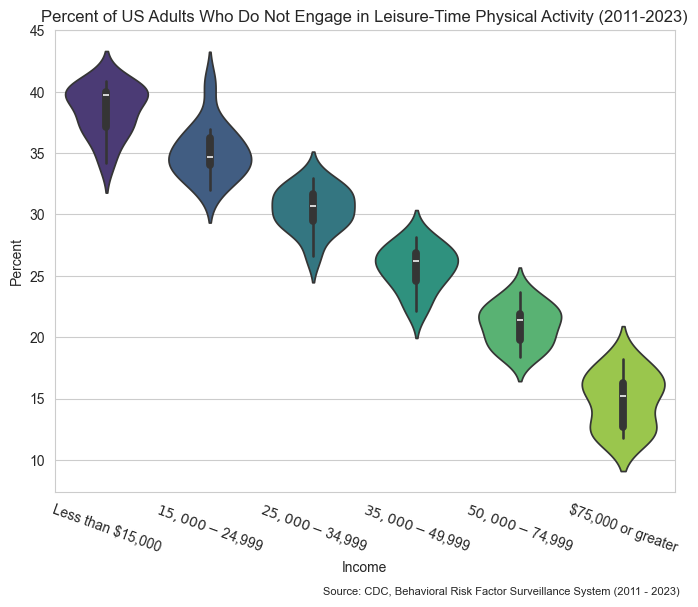

In [13]:
order = ['Less than $15,000',
  '$15,000 - $24,999',
  '$25,000 - $34,999',
  "$35,000 - $49,999",
  '$50,000 - $74,999',
  '$75,000 or greater']

# order data
noleisuretime_income_national['Income'] = pd.Categorical(noleisuretime_income_national['Income'],categories=order, ordered=True)

# plot
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))

sns.violinplot(data=noleisuretime_income_national, x="Income", y="Data_Value", palette='viridis')
plt.xticks(rotation=-20)
plt.ylabel('Percent')
plt.title('Percent of US Adults Who Do Not Engage in Leisure-Time Physical Activity (2011-2023)')
plt.text(2.1, -1, 'Source: CDC, Behavioral Risk Factor Surveillance System (2011 - 2023)', fontsize = 8)

plt.show()

/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_32183/504065497.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_clean['Short_Question'] = activity_clean['Question'].map(question_mapping)


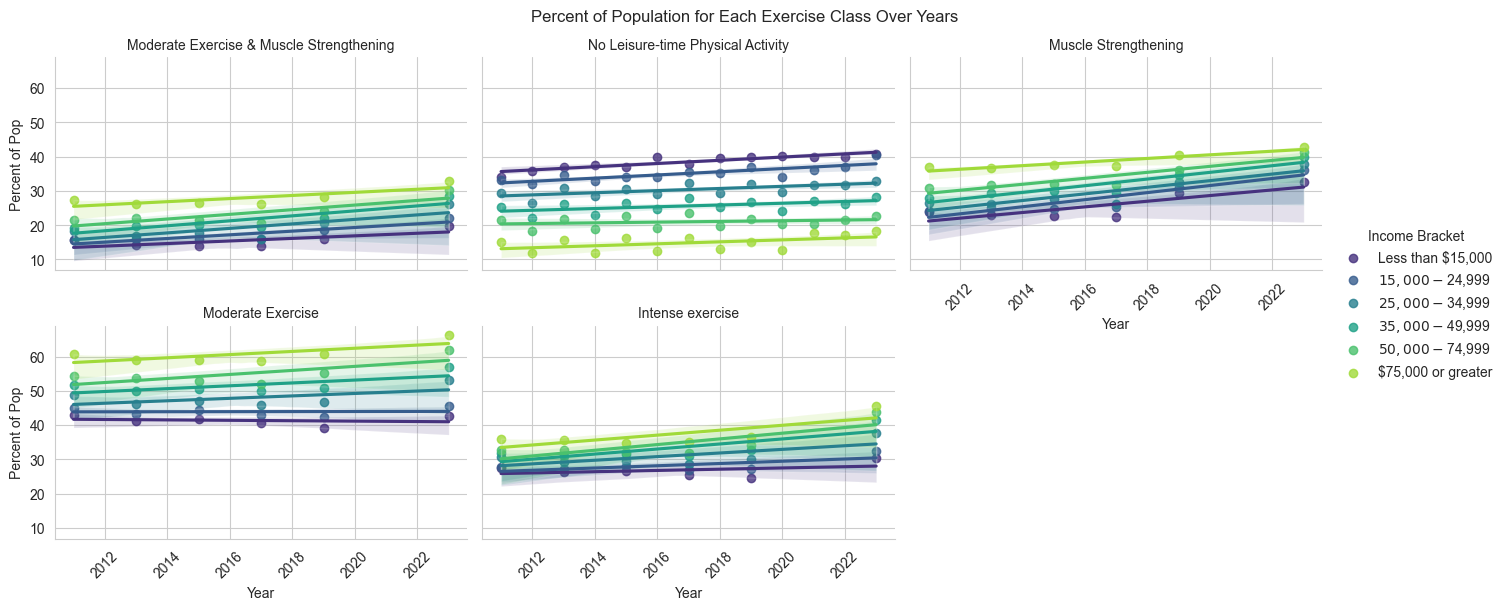

In [9]:
question_mapping = {
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week': 'Moderate Exercise & Muscle Strengthening',
    'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week': 'Muscle Strengthening',
    'Percent of adults who engage in no leisure-time physical activity': 'No Leisure-time Physical Activity',
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 'Moderate Exercise',
    'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 'Intense exercise'
}

activity_clean['Short_Question'] = activity_clean['Question'].map(question_mapping)
activity_clean['Question'].map(question_mapping)

national = activity_clean[activity_clean['LocationDesc'] == 'National']

g = sns.FacetGrid(national, col="Short_Question", hue='Income', hue_order=order, col_wrap=3, aspect=1.5, palette='viridis')
g.map(sns.regplot, 'YearStart', 'Data_Value', )

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Enhancing the plot with titles and labels
g.set_titles('{col_name}')  # Set titles to be each question
g.set_axis_labels('Year', 'Percent of Pop')  # Set common axis labels

# Adjust the top space to accommodate title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Percent of Population for Each Exercise Class Over Years')

# Adding the legend
g.add_legend(title='Income Bracket')
# Show the plot
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_32183/3313616050.py:22: SyntaxWarning: invalid escape sequence '\$'
  plt.xlabel("Minimum Income in Range (i.e. 15,000 for \$15,000 - \$24,999)", fontsize=12)
/var/folders/37/h4qvqqks7tx9rp77777_dk2c0000gn/T/ipykernel_32183/3313616050.py:22: SyntaxWarning: invalid escape sequence '\$'
  plt.xlabel("Minimum Income in Range (i.e. 15,000 for \$15,000 - \$24,999)", fontsize=12)


ValueError: Input y contains NaN.

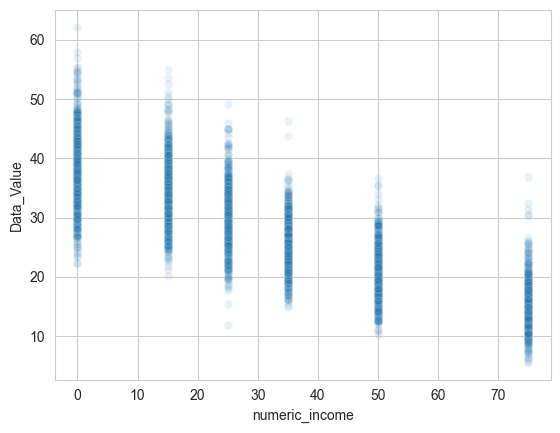

In [12]:
from sklearn.linear_model import LinearRegression

sns.set_style(style='whitegrid')
sns.scatterplot(data=noleisuretime, x='numeric_income', y='Data_Value', alpha=0.1)

noleisuretime['Data_Value'].dropna()

model = LinearRegression()
x = noleisuretime[['numeric_income']]
y = noleisuretime['Data_Value']
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(x, y)

x_range = np.linspace(x.min(), x.max(), 100)  # Range of x values
y_pred = model.predict(x_range)  # Predicted y values
plt.plot(x_range, y_pred, color='red', label=f"y = {slope:.2f}x + {intercept:.2f}, $R^2$ = {r_squared:.2f}")

plt.title("Percent of sample population who engage in no leisure time activity", fontsize=14)
plt.xlabel("Minimum Income in Range (i.e. 15,000 for \$15,000 - \$24,999)", fontsize=12)
plt.ylabel("Percent of Sample Population", fontsize=12)
plt.legend()
plt.show()